In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Wczytywanie dataset, z których będziemy korzystać

Naszym celem jest stworzenie wykresu przepływowego.

In [119]:
main=pd.read_csv('pokemon_data.csv')
main=main.set_index('name')
main

,dexnum,generation,type1,type2,species,height,weight,ability1,ability2,hidden_ability,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,NaN,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
Ivysaur,2,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,NaN,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
Venusaur,3,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,NaN,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
Charmander,4,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,NaN,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
Charmeleon,5,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,NaN,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Raging Bolt,1021,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox
Iron Boulder,1022,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
Iron Crown,1023,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox


In [120]:
capt=pd.read_csv('capture_flee_rate')
capt=capt.rename(columns={'Pokémon':'name'}).set_index('name')
capt

,Unnamed: 0,#,Base capture rate,Base flee rate,Movement type
name,,,,,
Bulbasaur,0,1,0.20,0.10,Jump
Ivysaur,1,2,0.10,0.07,Jump
Venusaur,2,3,0.05,0.05,Jump
Charmander,3,4,0.20,0.10,Jump
Charmeleon,4,5,0.10,0.07,Jump
...,...,...,...,...,...
Ursaluna,899,901,0.15,0.07,Jump
Basculegion,900,902,0.20,0.07,Hovering
Sneasler,901,903,0.30,0.10,Jump


In [121]:
evol=pd.read_csv('evolution_stage_map.csv')
evol=evol.set_index('name')
evol

,Evolution_Stage
name,
Bulbasaur,1
Ivysaur,2
Venusaur,3
Charmander,1
Charmeleon,2
...,...
Walking-wake,1
Iron-leaves,1
Poltchageist,1


##  Łączenie database w jeden, do zbiorów równoległych

In [122]:
df=pd.merge( 
    main, evol, 
    left_index=True, 
    right_index=True, 
    how='inner'
    )

df = pd.merge(
    df, 
    capt[['Movement type']], 
    left_index=True, 
    right_index=True, 
    how='inner'
)

df=df.reset_index().dropna(subset=['name', 'Evolution_Stage', 'type1', 'Movement type'])
df['Evolution_Stage'] = df['Evolution_Stage'].astype(int)
df

,name,dexnum,generation,type1,type2,species,height,weight,ability1,ability2,...,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,Evolution_Stage,Movement type
0,Bulbasaur,1,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,1,Jump
1,Ivysaur,2,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,2,Jump
2,Venusaur,3,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,3,Jump
3,Charmander,4,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,1,Jump
4,Charmeleon,5,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,2,Jump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,Ursaluna,901,8,Ground,Normal,Peat Pokémon,2.4,290.0,Guts,Bulletproof,...,275,Medium Fast,Field,NaN,50.0,50.0,20,Ordinary,3,Jump
884,Basculegion,902,8,Water,Ghost,Big Fish Pokémon,3.0,110.0,Swift Swim,Adaptability,...,265,Medium Fast,Water 2,NaN,100.0,0.0,20,Ordinary,2,Hovering
885,Sneasler,903,8,Fighting,Poison,Free Climb Pokémon,1.3,43.0,Pressure,Unburden,...,102,Medium Slow,Field,NaN,50.0,50.0,20,Ordinary,2,Jump
886,Overqwil,904,8,Dark,Poison,Pin Cluster Pokémon,2.5,60.5,Poison Point,Swift Swim,...,179,Medium Fast,Water 2,NaN,50.0,50.0,20,Ordinary,2,Hovering


In [123]:
df['Dual type'] = df['type2'].notna()
df

,name,dexnum,generation,type1,type2,species,height,weight,ability1,ability2,...,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,Evolution_Stage,Movement type,Dual type
0,Bulbasaur,1,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,1,Jump,True
1,Ivysaur,2,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,2,Jump,True
2,Venusaur,3,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,3,Jump,True
3,Charmander,4,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,1,Jump,False
4,Charmeleon,5,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,2,Jump,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,Ursaluna,901,8,Ground,Normal,Peat Pokémon,2.4,290.0,Guts,Bulletproof,...,Medium Fast,Field,NaN,50.0,50.0,20,Ordinary,3,Jump,True
884,Basculegion,902,8,Water,Ghost,Big Fish Pokémon,3.0,110.0,Swift Swim,Adaptability,...,Medium Fast,Water 2,NaN,100.0,0.0,20,Ordinary,2,Hovering,True
885,Sneasler,903,8,Fighting,Poison,Free Climb Pokémon,1.3,43.0,Pressure,Unburden,...,Medium Slow,Field,NaN,50.0,50.0,20,Ordinary,2,Jump,True
886,Overqwil,904,8,Dark,Poison,Pin Cluster Pokémon,2.5,60.5,Poison Point,Swift Swim,...,Medium Fast,Water 2,NaN,50.0,50.0,20,Ordinary,2,Hovering,True


## Tworzenie wykresu

In [136]:
def parallel_sets(df, title, cat_cols, color_col=None, cmap='Set1'):
    """
    Rysuje wykres Parallel Categories z szerokościami proporcjonalnymi do liczności.
    """
    
    df_agg = df.groupby(cat_cols).size().reset_index(name='__count__')
        
    # Sortowanie: pomaga w czytelnym ułożeniu wstęg (minimalizuje "spaghetti")
    sort_cols = [color_col] + cat_cols if color_col else cat_cols
    df_agg = df_agg.sort_values(by=sort_cols, ascending=False)
    
    # 2. Obliczanie pozycji Y dla bloków kategorii
    # Chcemy, aby kategorie układały się na osiach Y, a ich wysokość zależała od liczności
    y_starts = {}
    total_count = df_agg['__count__'].sum()
    gap = total_count * 0.05  # 5% odstępu między kategoriami
    
    for col in cat_cols:
        # Sumujemy liczności dla każdej unikalnej wartości w kolumnie
        cat_counts = df_agg.groupby(col)['__count__'].sum()
        sorted_cats = sorted(cat_counts.index, reverse=True) # Sortowanie etykiet
        
        current_y = 0
        y_starts[col] = {}
        for cat in sorted_cats:
            y_starts[col][cat] = current_y
            current_y += cat_counts[cat] + gap

    # Kursor śledzi, na jakiej wysokości jesteśmy wewnątrz każdego bloku kategorii
    y_cursors = {col: y_starts[col].copy() for col in cat_cols}
    
# 3. Rysowanie
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # --- PRZYGOTOWANIE KOLORÓW DYSKRETNYCH ---
    if color_col:
        # Pobieramy unikalne wartości z kolumny
        unique_vals = sorted(df_agg[color_col].unique())
        # Pobieramy obiekt palety (np. Set1)
        cmap_obj = plt.get_cmap(cmap)
        
        # Tworzymy słownik: unikalna wartość -> kolejny kolor z palety (0, 1, 2...)
        # Modulo (i % cmap_obj.N) zabezpiecza przed brakiem kolorów, gdy kategorii jest b. dużo
        color_lookup = {val: cmap_obj(i % cmap_obj.N) for i, val in enumerate(unique_vals)}
    
    # Funkcja generująca krzywą sigmoidalną ("esownicę")
    def get_sigmoid_points(x_start, x_end, y_start, y_end, steps=100):
        t = np.linspace(0, 1, steps)
        x = x_start + (x_end - x_start) * t
        # Wzór sigmoidy: steruje gładkością przejścia
        sigmoid = 1 / (1 + np.exp(-12 * (t - 0.5)))
        y = y_start + (y_end - y_start) * sigmoid
        return x, y
        
        return x, y

    # Rysujemy wstęgę dla każdego wiersza ze zgrupowanych danych
    for _, row in df_agg.iterrows():
        count = row['__count__']
        
        # Dobieramy kolor ze słownika
        if color_col:
            color = color_lookup[row[color_col]]
        else:
            color = 'gray'
            
        for i in range(len(cat_cols) - 1):
            col1, col2 = cat_cols[i], cat_cols[i+1]
            val1, val2 = row[col1], row[col2]
            
            # Pobieramy aktualną wysokość startową dla danej kategorii
            y1 = y_cursors[col1][val1]
            y2 = y_cursors[col2][val2]
            
            # Obliczamy krzywe
            x, y_bot = get_sigmoid_points(i, i+1, y1, y2)
            _, y_top = get_sigmoid_points(i, i+1, y1 + count, y2 + count)
            
            # Wypełniamy przestrzeń
            # ustawienie edgecolor konieczne żeby to działało
            ax.fill_between(x, y_bot, y_top, color=color, alpha=0.6, edgecolor=None) 
            
        # Po narysowaniu całej ścieżki podnosimy kursory w użytych blokach
        for col in cat_cols:
            y_cursors[col][row[col]] += count

# 4. Opisy osi i etykiet
    for i, col in enumerate(cat_cols):
        # Tytuł kolumny na górze
        ax.text(i, -gap/2, col, ha='center', va='top', fontweight='bold', fontsize=12)
        
        # Iterujemy po kategoriach, żeby narysować belki i podpisy
        for cat, start_y in y_starts[col].items():
            h = df_agg[df_agg[col] == cat]['__count__'].sum()
            center_y = start_y + h / 2
            
            # ZMIANA: Używamy ax.bar (prostokąt) zamiast vlines.
            # width=0.05 to szerokość belki (możesz dać 0.02 dla cieńszej, 0.1 dla grubszej)
            # color='black', alpha=1.0 daje pełną czerń
            ax.bar(i, h, bottom=start_y, width=0.005, color='black', alpha=1.0, align='center')
            
            # Etykieta z nazwą kategorii
            ax.text(i, center_y, str(cat), ha='center', va='center', 
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.2'))


    ax.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()


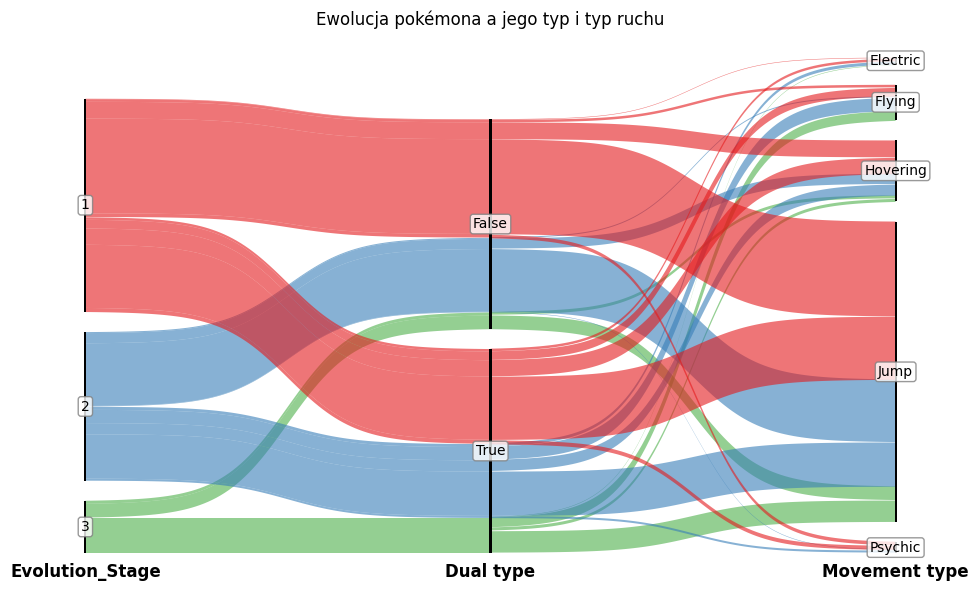

In [137]:
parallel_sets(df, title='Ewolucja pokémona a jego typ i typ ruchu', cat_cols=['Evolution_Stage','Dual type', 'Movement type'], color_col='Evolution_Stage', cmap='Set1')

## Wersja z plotly

In [146]:
import plotly.express as px

fig = px.parallel_categories(df, dimensions=['Evolution_Stage','Dual type', 'Movement type'],
                color="Evolution_Stage", color_continuous_scale=px.colors.qualitative.Plotly)
fig.show()